In [34]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cali_13 = pd.read_csv('data/cali_metros_13.csv')
cali_14 = pd.read_csv('data/cali_metros_14.csv')
cali_15 = pd.read_csv('data/cali_metros_15.csv')
cali_16 = pd.read_csv('data/cali_metros_16.csv')
cali_17 = pd.read_csv('data/cali_metros_17.csv')
cali_18 = pd.read_csv('data/cali_metros_18.csv')

In [3]:
cali_lst = [cali_13,cali_14,cali_15,cali_16,cali_17,cali_18]
cali_concat = pd.concat(cali_lst, ignore_index=True)

In [4]:
cali_concat.shape

(6954, 260)

In [5]:
cali_top5 = ['Los Angeles-Long Beach-Anaheim', 'San Francisco-Oakland-Hayward','Riverside-San Bernardino-Ontario',\
'Sacramento--Roseville--Arden-Arcade', 'San Diego-Carlsbad']

In [6]:
cali_top5_df = cali_concat[cali_concat['Metro'].isin(cali_top5)]

In [7]:
cali_top5_df = cali_top5_df.drop(columns=['RegionID','State','SizeRank','do_date'])

In [8]:
cali_top5_df.head()

,RegionName,City,Metro,CountyName,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,...,speak_spanish_at_home,speak_spanish_at_home_low_english,pop_15_and_over,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,avg_rent,Date
0,94109,San Francisco,San Francisco-Oakland-Hayward,San Francisco County,25096.0,8269.0,1939.0,1425.0,6442.0,2043.0,...,4015.0,1224.0,52542.0,29413.0,14320.0,986.0,1136.0,3506.0,3747.083333,2013
1,90250,Hawthorne,Los Angeles-Long Beach-Anaheim,Los Angeles County,10196.0,21200.0,1965.0,786.0,5728.0,1952.0,...,40425.0,16702.0,73067.0,32819.0,27720.0,2285.0,1854.0,4583.0,2309.416667,2013
2,94565,Pittsburg,San Francisco-Oakland-Hayward,Contra Costa County,6676.0,19322.0,1979.0,553.0,3632.0,1291.0,...,30041.0,14947.0,66435.0,25894.0,28380.0,1842.0,1982.0,5174.0,1716.500000,2013
3,90046,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,21276.0,7452.0,1959.0,870.0,6388.0,1891.0,...,4847.0,1016.0,46964.0,26353.0,11830.0,865.0,870.0,2905.0,2799.833333,2013
4,94501,Alameda,San Francisco-Oakland-Hayward,Alameda County,10299.0,14372.0,1950.0,683.0,2995.0,1176.0,...,4308.0,1158.0,51255.0,18319.0,23250.0,1138.0,1558.0,4514.0,2352.833333,2013


In [9]:
# Condensing female age groups
cali_top5_df['female_19_under'] = cali_top5_df['female_under_5']+\
                                  cali_top5_df['female_5_to_9']+\
                                  cali_top5_df['female_10_to_14']+\
                                  cali_top5_df['female_15_to_17']+\
                                  cali_top5_df['female_18_to_19']

cali_top5_df['female_20_to_29'] = cali_top5_df['female_20']+\
                                  cali_top5_df['female_21']+\
                                  cali_top5_df['female_22_to_24']+\
                                  cali_top5_df['female_25_to_29']

cali_top5_df['female_30_to_39'] = cali_top5_df['female_30_to_34']+\
                                  cali_top5_df['female_35_to_39']

cali_top5_df['female_40_to_64'] = cali_top5_df['female_40_to_44']+\
                                  cali_top5_df['female_45_to_49']+\
                                  cali_top5_df['female_50_to_54']+\
                                  cali_top5_df['female_55_to_59']+\
                                  cali_top5_df['female_60_to_61']+\
                                  cali_top5_df['female_62_to_64']

cali_top5_df['female_64_over'] =  cali_top5_df['female_65_to_66']+\
                                  cali_top5_df['female_67_to_69']+\
                                  cali_top5_df['female_70_to_74']+\
                                  cali_top5_df['female_75_to_79']+\
                                  cali_top5_df['female_80_to_84']+\
                                  cali_top5_df['female_85_and_over']

cali_top5_df = cali_top5_df.drop(columns = ['female_under_5','female_5_to_9',
                                            'female_10_to_14','female_15_to_17',
                                            'female_18_to_19','female_20',
                                            'female_21','female_22_to_24',
                                            'female_25_to_29','female_30_to_34',
                                            'female_35_to_39','female_40_to_44',
                                            'female_45_to_49','female_50_to_54',
                                            'female_55_to_59','female_60_to_61',
                                            'female_62_to_64','female_65_to_66',
                                            'female_67_to_69','female_70_to_74',
                                            'female_75_to_79','female_80_to_84',
                                            'female_85_and_over','female_pop'])

In [10]:
# Condensing male age groups
cali_top5_df['male_19_under'] = cali_top5_df['male_under_5']+\
                                cali_top5_df['male_5_to_9']+\
                                cali_top5_df['male_10_to_14']+\
                                cali_top5_df['male_15_to_17']+\
                                cali_top5_df['male_18_to_19']

cali_top5_df['male_20_to_29'] = cali_top5_df['male_20']+\
                                cali_top5_df['male_21']+\
                                cali_top5_df['male_22_to_24']+\
                                cali_top5_df['male_25_to_29']

cali_top5_df['male_30_to_39'] = cali_top5_df['male_30_to_34']+\
                                cali_top5_df['male_35_to_39']

cali_top5_df['male_40_to_64'] = cali_top5_df['male_40_to_44']+\
                                cali_top5_df['male_45_to_49']+\
                                cali_top5_df['male_50_to_54']+\
                                cali_top5_df['male_55_to_59']+\
                                cali_top5_df['male_60_61']+\
                                cali_top5_df['male_62_64']

cali_top5_df['male_64_over'] =  cali_top5_df['male_65_to_66']+\
                                cali_top5_df['male_67_to_69']+\
                                cali_top5_df['male_70_to_74']+\
                                cali_top5_df['male_75_to_79']+\
                                cali_top5_df['male_80_to_84']+\
                                cali_top5_df['male_85_and_over']

cali_top5_df = cali_top5_df.drop(columns = ['male_under_5','male_5_to_9',
                                            'male_10_to_14','male_15_to_17',
                                            'male_18_to_19','male_20',
                                            'male_21','male_22_to_24',
                                            'male_25_to_29','male_30_to_34',
                                            'male_35_to_39','male_40_to_44',
                                            'male_45_to_49','male_50_to_54',
                                            'male_55_to_59','male_60_61',
                                            'male_62_64','male_65_to_66',
                                            'male_67_to_69','male_70_to_74',
                                            'male_75_to_79','male_80_to_84',
                                            'male_85_and_over','male_pop'])

In [11]:
# Condensing commute times 
cali_top5_df['commute_30_mins_less'] = cali_top5_df['commute_less_10_mins']+\
                                       cali_top5_df['commute_10_14_mins']+\
                                       cali_top5_df['commute_15_19_mins']+\
                                       cali_top5_df['commute_20_24_mins']+\
                                       cali_top5_df['commute_25_29_mins']

cali_top5_df['commute_30_to_59'] = cali_top5_df['commute_30_34_mins']+\
                                   cali_top5_df['commute_35_39_mins']+\
                                   cali_top5_df['commute_40_44_mins']+\
                                   cali_top5_df['commute_45_59_mins']

cali_top5_df = cali_top5_df.drop(columns = ['commute_5_9_mins','commute_less_10_mins',
                                            'commute_15_19_mins','commute_20_24_mins',
                                            'commute_25_29_mins','commute_30_34_mins',
                                            'commute_35_39_mins','commute_35_44_mins',
                                            'commute_40_44_mins','commute_45_59_mins',
                                            'commute_60_89_mins','commute_90_more_mins',
                                            'commute_10_14_mins'])

In [12]:
# Condensing dwellings
cali_top5_df['dwellings_1_unit'] = cali_top5_df['dwellings_1_units_attached']+\
                                   cali_top5_df['dwellings_1_units_detached']

cali_top5_df['dwellings_2_to_49_units'] = cali_top5_df['dwellings_2_units']+\
                                          cali_top5_df['dwellings_3_to_4_units']+\
                                          cali_top5_df['dwellings_5_to_9_units']+\
                                          cali_top5_df['dwellings_10_to_19_units']+\
                                          cali_top5_df['dwellings_20_to_49_units']

cali_top5_df = cali_top5_df.drop(columns = ['dwellings_1_units_attached','dwellings_1_units_detached',
                                            'dwellings_2_units','dwellings_3_to_4_units',
                                            'dwellings_5_to_9_units','dwellings_10_to_19_units',
                                            'dwellings_20_to_49_units'])

In [13]:
# Condensing income, to closer match tax brackets
cali_top5_df['income_10000_39999'] = cali_top5_df['income_10000_14999']+\
                                     cali_top5_df['income_15000_19999']+\
                                     cali_top5_df['income_20000_24999']+\
                                     cali_top5_df['income_25000_29999']+\
                                     cali_top5_df['income_30000_34999']+\
                                     cali_top5_df['income_35000_39999']

cali_top5_df['income_40000_99999'] = cali_top5_df['income_40000_44999']+\
                                     cali_top5_df['income_45000_49999']+\
                                     cali_top5_df['income_50000_59999']+\
                                     cali_top5_df['income_60000_74999']+\
                                     cali_top5_df['income_75000_99999']

cali_top5_df['income_100000_199999'] = cali_top5_df['income_100000_124999']+\
                                       cali_top5_df['income_125000_149999']+\
                                       cali_top5_df['income_150000_199999']

cali_top5_df = cali_top5_df.drop(columns = ['income_10000_14999','income_15000_19999',
                                            'income_20000_24999','income_25000_29999',
                                            'income_30000_34999','income_35000_39999',
                                            'income_40000_44999','income_45000_49999',
                                            'income_50000_59999','income_60000_74999',
                                            'income_75000_99999','income_100000_124999',
                                            'income_125000_149999','income_150000_199999'])

In [14]:
# Renaming degree types for organization
cali_top5_df = cali_top5_df.rename(columns = {'associates_degree':'degree_associates',
                                              'bachelors_degree':'degree_bachelors',
                                              'graduate_professional_degree':'degree_graduate_professional',
                                              'walked_to_work':'commuters_walked_to_work'})

In [15]:
cali_top5_reduced = cali_top5_df[['Date','RegionName','City',
              'CountyName','Metro','female_19_under',
              'female_20_to_29','female_30_to_39','female_40_to_64',
              'female_64_over','male_19_under','male_20_to_29',
              'male_30_to_39','male_40_to_64','male_64_over',
              'commute_30_mins_less','commute_30_to_59','commute_60_more_mins',
              'income_10000_39999','income_40000_99999','income_100000_199999',
              'income_200000_or_more','degree_associates','degree_bachelors',
              'degree_graduate_professional','mobile_homes','unemployed_pop',
              'total_pop','vacant_housing_units','vacant_housing_units_for_rent','housing_units',
              'amerindian_pop','asian_pop','black_pop','hispanic_pop','other_race_pop',
              'white_pop','dwellings_1_unit','dwellings_2_to_49_units',
              'dwellings_50_or_more_units','commuters_by_public_transportation',
              'commuters_walked_to_work','households_public_asst_or_food_stamps','households',
              'housing_built_1939_or_earlier','housing_built_2000_to_2004','housing_built_2005_or_later']]

In [16]:
# Removing redundant ethnic variables
cali_top5_df = cali_top5_df.drop(columns = ['amerindian_including_hispanic','asian_including_hispanic',
                                            'black_including_hispanic','not_hispanic_pop',
                                            'two_or_more_races_pop','white_including_hispanic',
                                            'hispanic_any_race'])

In [17]:
# Removing redundant sex/education variables
cali_top5_df = cali_top5_df.drop(columns = ['male_45_64_associates_degree','male_45_64_bachelors_degree',
                                            'male_45_64_grade_9_12','male_45_64_graduate_degree',
                                            'male_45_64_high_school','male_45_64_less_than_9_grade',
                                            'male_45_64_some_college'])

In [22]:
# Removing redundant education variables
cali_top5_df = cali_top5_df.drop(columns = ['in_grades_1_to_4','in_grades_5_to_8','in_grades_9_to_12',
                                            'in_undergrad_college','bachelors_degree_2',
                                            'bachelors_degree_or_higher_25_64','masters_degree',
                                            'high_school_diploma','high_school_including_ged',
                                            'some_college_and_associates_degree','one_year_more_college'])

# Removing redundant population variables
cali_top5_df = cali_top5_df.drop(columns = ['population_1_year_and_over','population_3_years_over',
                                            'pop_5_years_over','pop_15_and_over',
                                            'pop_16_over','pop_25_64',
                                            'pop_25_years_over','pop_divorced','pop_never_married',
                                            'pop_now_married','pop_separated','pop_widowed'])

# Removing redundant commuting variables
cali_top5_df = cali_top5_df.drop(columns = ['commuters_by_bus','commuters_by_car_truck_van',
                                            'commuters_by_carpool','commuters_by_subway_or_elevated',
                                            'commuters_drove_alone','no_car','no_cars','one_car',
                                            'two_cars','three_cars','four_more_cars',
                                            'aggregate_travel_time_to_work'])

# Removing redundant housing/rent variables
cali_top5_df = cali_top5_df.drop(columns = ['rent_under_10_percent','rent_10_to_15_percent',
                                            'rent_15_to_20_percent','rent_20_to_25_percent',
                                            'rent_25_to_30_percent','rent_30_to_35_percent',
                                            'rent_35_to_40_percent','rent_40_to_50_percent',
                                            'rent_burden_not_computed','rent_over_50_percent',
                                            'renter_occupied_housing_units_paying_cash_median_gross_rent',
                                            'owner_occupied_housing_units','owner_occupied_housing_units_lower_value_quartile',
                                            'owner_occupied_housing_units_median_value',
                                            'owner_occupied_housing_units_upper_value_quartile','family_households',
                                            'nonfamily_households','different_house_year_ago_different_city',
                                            'different_house_year_ago_same_city'])

# Removing redundant family variables
cali_top5_df = cali_top5_df.drop(columns = ['two_parent_families_with_young_children',
                                            'two_parents_father_in_labor_force_families_with_young_children',
                                            'two_parents_in_labor_force_families_with_young_children',
                                            'two_parents_mother_in_labor_force_families_with_young_children',
                                            'two_parents_not_in_labor_force_families_with_young_children',
                                            'speak_only_english_at_home','speak_spanish_at_home',
                                            'speak_spanish_at_home_low_english','families_with_young_children',
                                            'father_in_labor_force_one_parent_families_with_young_children',
                                            'father_one_parent_families_with_young_children',
                                            'children_in_single_female_hh'])

In [27]:
len(cali_top5_df.columns)

111

In [35]:
cali_top5_df

,RegionName,City,Metro,CountyName,median_year_structure_built,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,million_dollar_housing_units,mortgaged_housing_units,one_parent_families_with_young_children,income_less_10000,income_200000_or_more,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,households_retirement_income,armed_forces,civilian_labor_force,employed_pop,unemployed_pop,not_in_labor_force,pop_in_labor_force,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,children,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,degree_graduate_professional,group_quarters,households_public_asst_or_food_stamps,in_school,less_than_high_school_graduate,male_45_to_64,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,pop_determined_poverty_status,poverty,sales_office_employed,commuters_walked_to_work,worked_at_home,workers_16_and_over,degree_associates,degree_bachelors,less_one_year_college,commute_60_more_mins,commuters_16_over,avg_rent,Date,female_19_under,female_20_to_29,female_30_to_39,female_40_to_64,female_64_over,male_19_under,male_20_to_29,male_30_to_39,male_40_to_64,male_64_over,commute_30_mins_less,commute_30_to_59,dwellings_1_unit,dwellings_2_to_49_units,income_10000_39999,income_40000_99999,income_100000_199999
0,94109,San Francisco,San Francisco-Oakland-Hayward,San Francisco County,1939.0,55519.0,37.0,29932.0,1865.0,15509.0,5680.0,29.0,862.0,12526.0,33365.0,60722.0,58033.0,36850.0,3485.0,1099.0,193.0,1333.0,28.0,1501.0,3235.0,321.0,3064.0,3902.0,6336.0,33365.0,28151.0,10262.0,38.0,16.0,1207.0,22240.0,2771.0,48.0,36924.0,34454.0,2470.0,15512.0,36972.0,880.0,1027.0,445.0,218.0,292.0,302.0,2558.0,1942.0,3406.0,0.0,4641.0,546.0,4552.0,4353.0,2078.0,1553.0,1067.0,847.0,3899.0,9404.0,908.0,606.0,60.0,0.5331,10222.0,1311.0,1682.0,8402.0,4647.0,7807.0,369.0,18970.0,7751.0,18970.0,532.0,1134.0,8780.0,5038.0,54659.0,8438.0,8780.0,8113.0,2829.0,33770.0,2521.0,17866.0,1050.0,3554.0,30941.0,3747.083333,2013,2127.0,8139.0,5473.0,7003.0,4924.0,2041.0,6000.0,6432.0,9512.0,3868.0,17396.0,9991.0,1284.0,25230.0,9405.0,9814.0,7180.0
1,90250,Hawthorne,Los Angeles-Long Beach-Anaheim,Los Angeles County,1965.0,93994.0,31.5,12573.0,21902.0,6519.0,49389.0,66.0,359.0,2845.0,31396.0,45995.0,21018.0,33179.0,1783.0,880.0,56.0,981.0,32.6,50.0,7627.0,3939.0,2355.0,727.0,11809.0,31396.0,21725.0,3748.0,292.0,123.0,824.0,1512.0,2725.0,102.0,48767.0,43982.0,4785.0,22751.0,48869.0,455.0,340.0,1492.0,744.0,2769.0,1486.0,1013.0,1120.0,25477.0,81.0,5081.0,2484.0,8869.0,2327.0,1065.0,4396.0,3027.0,1960.0,4837.0,4901.0,4050.0,904.0,44.0,0.4351,2738.0,541.0,3526.0,28856.0,14697.0,9545.0,44.0,10668.0,16557.0,10668.0,3940.0,6236.0,11522.0,11616.0,93235.0,17368.0,11522.0,744.0,1065.0,43085.0,4826.0,7996.0,3082.0,4091.0,42020.0,2309.416667,2013,13270.0,8673.0,7696.0,14190.0,4542.0,14845.0,7671.0,7372.0,12553.0,3182.0,24978.0,12951.0,13146.0,15993.0,1096

In [50]:
# Create a list of the features that need to be divided by the total_pop
pop_features = [
 'white_pop',
 'black_pop',
 'asian_pop',
 'hispanic_pop',
 'amerindian_pop',
 'other_race_pop',
 'commuters_by_public_transportation',
 'income_less_10000',
 'income_200000_or_more',
 'armed_forces',
 'civilian_labor_force',
 'employed_pop',
 'unemployed_pop',
 'not_in_labor_force',
 'pop_in_labor_force',
 'asian_male_45_54',
 'asian_male_55_64',
 'black_male_45_54',
 'black_male_55_64',
 'hispanic_male_45_54',
 'hispanic_male_55_64',
 'white_male_45_54',
 'white_male_55_64',
 'children',
 'employed_agriculture_forestry_fishing_hunting_mining',
 'employed_arts_entertainment_recreation_accommodation_food',
 'employed_construction',
 'employed_education_health_social',
 'employed_finance_insurance_real_estate',
 'employed_information',
 'employed_manufacturing',
 'employed_other_services_not_public_admin',
 'employed_public_administration',
 'employed_retail_trade',
 'employed_science_management_admin_waste',
 'employed_transportation_warehousing_utilities',
 'employed_wholesale_trade',
 'degree_graduate_professional',
 'group_quarters',
 'in_school',
 'less_than_high_school_graduate',
 'male_45_to_64',
 'management_business_sci_arts_employed',
 'not_us_citizen_pop',
 'occupation_management_arts',
 'occupation_natural_resources_construction_maintenance',
 'occupation_production_transportation_material',
 'occupation_sales_office',
 'occupation_services',
 'pop_determined_poverty_status',
 'poverty',
 'sales_office_employed',
 'commuters_walked_to_work',
 'worked_at_home',
 'workers_16_and_over',
 'degree_associates',
 'degree_bachelors',
 'less_one_year_college',
 'commute_60_more_mins',
 'commuters_16_over',
 'female_19_under',
 'female_20_to_29',
 'female_30_to_39',
 'female_40_to_64',
 'female_64_over',
 'male_19_under',
 'male_20_to_29',
 'male_30_to_39',
 'male_40_to_64',
 'male_64_over',
 'commute_30_mins_less',
 'commute_30_to_59',
 'income_10000_39999',
 'income_40000_99999',
 'income_100000_199999']

In [38]:
for pop in pop_features: 
    cali_top5_df[pop] = cali_top5_df[pop]/cali_top5_df['total_pop']

In [44]:
# Create a list of the features that need to be divided by housing_units
housing_unit_feats = [
 'vacant_housing_units',
 'vacant_housing_units_for_rent',
 'vacant_housing_units_for_sale',
 'million_dollar_housing_units',
 'mortgaged_housing_units',
 'occupied_housing_units',
 'housing_units_renter_occupied',
 'dwellings_50_or_more_units',
 'mobile_homes',
 'housing_built_2005_or_later',
 'housing_built_2000_to_2004',
 'housing_built_1939_or_earlier',
 'dwellings_1_unit',
 'dwellings_2_to_49_units']
    
for feat in housing_unit_feats: 
    cali_top5_df[feat] = cali_top5_df[feat]/cali_top5_df['housing_units']

In [55]:
households_feats = [
 'one_parent_families_with_young_children',
 'married_households',
 'households_retirement_income',
 'female_female_households',
 'households_public_asst_or_food_stamps',
 'male_male_households']

for feat in households_feats: 
    cali_top5_df[feat] = cali_top5_df[feat]/cali_top5_df['households']

In [58]:
# Just to make sure I got them all... 
remaining_feats = [x for x in list(cali_top5_df.columns) if x not in pop_features + housing_unit_feats + households_feats]
remaining_feats

['RegionName',
 'City',
 'Metro',
 'CountyName',
 'median_year_structure_built',
 'total_pop',
 'median_age',
 'households',
 'median_income',
 'income_per_capita',
 'housing_units',
 'median_rent',
 'percent_income_spent_on_rent',
 'gini_index',
 'avg_rent',
 'Date']

# How can we pair down employment?

In [60]:
jobs_feats = [ 'employed_agriculture_forestry_fishing_hunting_mining',
 'employed_arts_entertainment_recreation_accommodation_food',
 'employed_construction',
 'employed_education_health_social',
 'employed_finance_insurance_real_estate',
 'employed_information',
 'employed_manufacturing',
 'employed_other_services_not_public_admin',
 'employed_public_administration',
 'employed_retail_trade',
 'employed_science_management_admin_waste',
 'employed_transportation_warehousing_utilities',
 'employed_wholesale_trade',
 'occupation_management_arts',
 'occupation_natural_resources_construction_maintenance',
 'occupation_production_transportation_material',
 'occupation_sales_office',
 'occupation_services',
 'management_business_sci_arts_employed',
 'sales_office_employed'
             ]
jobs_df = cali_top5_df[jobs_feats]
jobs_df

,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,management_business_sci_arts_employed,sales_office_employed
0,0.000000,0.083593,0.009834,0.081990,0.078406,0.037429,0.027972,0.019219,0.015256,0.070228,0.169383,0.016355,0.010915,0.341685,0.009582,0.020425,0.158144,0.090744,0.341685,0.158144
1,0.000862,0.054057,0.026427,0.094357,0.024757,0.011331,0.046769,0.032204,0.020852,0.051461,0.052142,0.043088,0.009618,0.113497,0.041918,0.066345,0.122582,0.123582,0.113497,0.122582
2,0.001891,0.036019,0.043664,0.092838,0.031437,0.007088,0.027481,0.025266,0.016078,0.054800,0.065832,0.023178,0.009710,0.100610,0.057016,0.045775,0.107234,0.124646,0.100610,0.107234
3,0.001644,0.120933,0.006772,0.081051,0.038318,0.096061,0.023248,0.043288,0.010753,0.051803,0.110834,0.014139,0.011030,0.344997,0.009545,0.016634,0.137587,0.101111,0.344997,0.137587
4,0.001038,0.046188,0.020296,0.124304,0.036600,0.021301,0.033842,0.030516,0.018754,0.048606,0.080793,0.031555,0.012865,0.230828,0.026379,0.042035,0.121190,0.086228,0.230828,0.121190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,0.046431,0.013929,0.033082,0.080673,0.000000,0.002322,0.072548,0.008125,0.017411,0.031921,0.019733,0.005804,0.000000,0.102147,0.081834,0.035984,0.056297,0.055717,0.102147,0.056297
6947,0.043371,0.147460,0.118959,0.063197,0.040892,0.000000,0.013631,0.000000,0.000000,0.017348,0.074349,0.055762,0.000000,0.187113,0.123916,0.081784,0.099133,0.083024,0.187113,0.099133
6948,0.000000,0.107595,0.000000,0.104430,0.053797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161392,0.000000,0.000000,0.053797,0.050633,0.161392,0.053797
6950,0.000000,0.178161,0.153736,0.020115,0.041667,0.000000,0.008621,0.024425,0.000000,0.000000,0.106322,0.021552,0.000000,0.114943,0.188218,0.008621,0.109195,0.133621,0.114943,0.109195


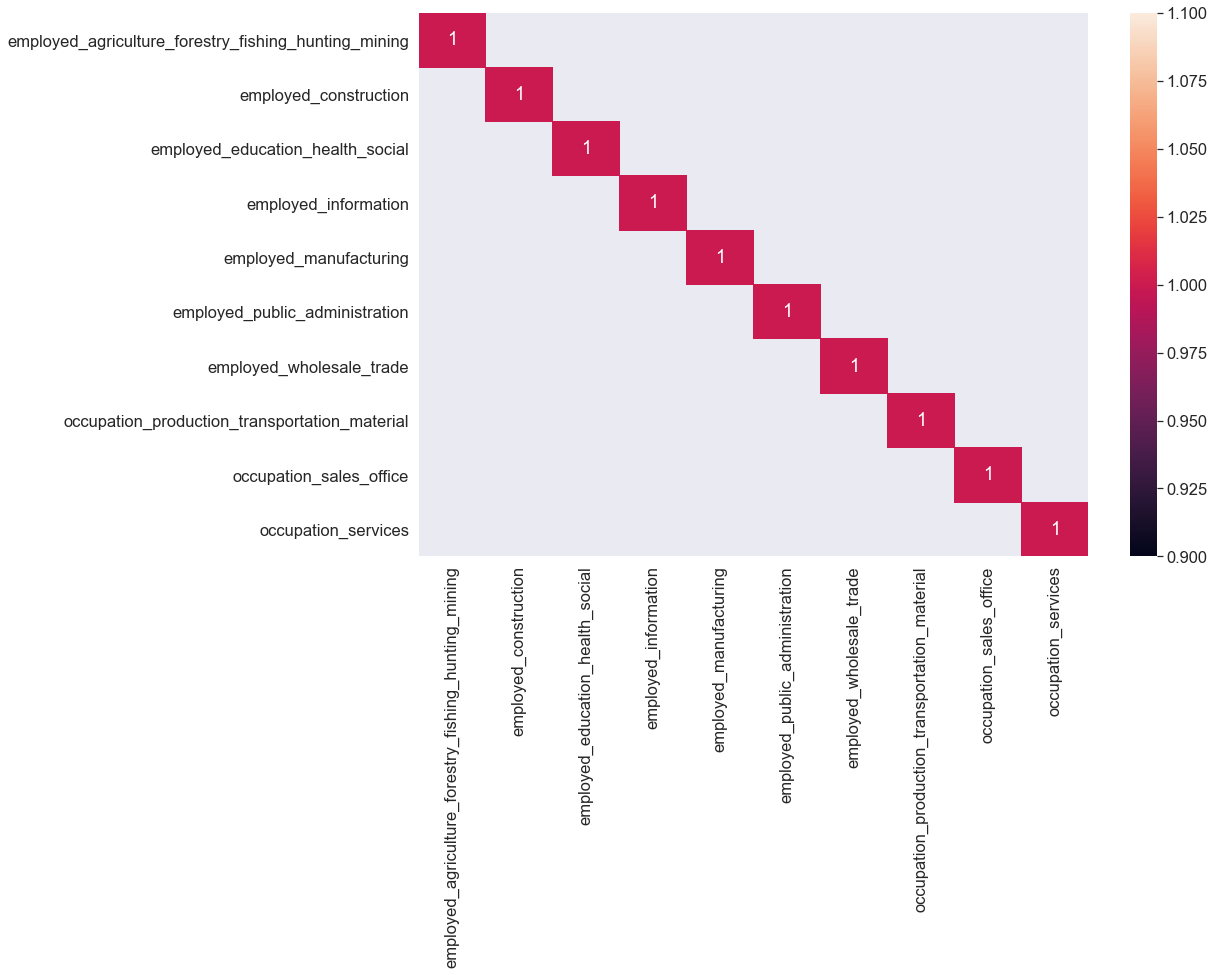

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

#corrMatrix = jobs_df.corr()
corrMatrix = jobs_df.drop(columns=[
     'sales_office_employed',  # perfectly correlated with 'occupation_sales_office'
     'management_business_sci_arts_employed', # perfectly correlated with 'occupation_management_arts'
     'occupation_natural_resources_construction_maintenance', #0.8 correlation w/ 'employed_construction'
     'occupation_management_arts', # 0.84 correlation w/ 'employed_science_management_admin_waste'
     'employed_arts_entertainment_recreation_accommodation_food', # 0.63 w/ 'occupation_services'
     'employed_finance_insurance_real_estate', # 0.63 w/ 'employed_science_management_admin_waste'
     'employed_science_management_admin_waste', # 0.59 w/ 'employed_information'
     'employed_transportation_warehousing_utilities', # 0.59 w/ 'occupation_production_transportation_material'
     'employed_other_services_not_public_admin', # 0.56 w/ occupation_services
     'employed_retail_trade' # 0.55 w/ 'occupation_sales_office'
]).corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.set(font_scale = 1.5)

sns.heatmap(corrMatrix[corrMatrix > 0.5], annot=True)
plt.show()

In [82]:
list(corrMatrix[corrMatrix > 0.8].sum()[corrMatrix[corrMatrix > 0.8].sum() > 1].keys())

['employed_construction',
 'employed_science_management_admin_waste',
 'occupation_management_arts',
 'occupation_natural_resources_construction_maintenance',
 'occupation_sales_office',
 'management_business_sci_arts_employed',
 'sales_office_employed']

In [118]:
cali_top5_df = cali_top5_df.drop(columns = [
     'sales_office_employed',  # perfectly correlated with 'occupation_sales_office'
     'management_business_sci_arts_employed', # perfectly correlated with 'occupation_management_arts'
     'occupation_natural_resources_construction_maintenance', #0.8 correlation w/ 'employed_construction'
     'occupation_management_arts', # 0.84 correlation w/ 'employed_science_management_admin_waste'
     'employed_arts_entertainment_recreation_accommodation_food', # 0.63 w/ 'occupation_services'
     'employed_finance_insurance_real_estate', # 0.63 w/ 'employed_science_management_admin_waste'
     'employed_science_management_admin_waste', # 0.59 w/ 'employed_information'
     'employed_transportation_warehousing_utilities', # 0.59 w/ 'occupation_production_transportation_material'
     'employed_other_services_not_public_admin', # 0.56 w/ occupation_services
     'employed_retail_trade' # 0.55 w/ 'occupation_sales_office'
])

In [130]:
list(cali_top5_df.columns[4:])

['median_year_structure_built',
 'total_pop',
 'median_age',
 'white_pop',
 'black_pop',
 'asian_pop',
 'hispanic_pop',
 'amerindian_pop',
 'other_race_pop',
 'commuters_by_public_transportation',
 'households',
 'median_income',
 'income_per_capita',
 'housing_units',
 'vacant_housing_units',
 'vacant_housing_units_for_rent',
 'vacant_housing_units_for_sale',
 'median_rent',
 'percent_income_spent_on_rent',
 'million_dollar_housing_units',
 'mortgaged_housing_units',
 'one_parent_families_with_young_children',
 'income_less_10000',
 'income_200000_or_more',
 'married_households',
 'occupied_housing_units',
 'housing_units_renter_occupied',
 'dwellings_50_or_more_units',
 'mobile_homes',
 'housing_built_2005_or_later',
 'housing_built_2000_to_2004',
 'housing_built_1939_or_earlier',
 'households_retirement_income',
 'armed_forces',
 'civilian_labor_force',
 'employed_pop',
 'unemployed_pop',
 'not_in_labor_force',
 'pop_in_labor_force',
 'asian_male_45_54',
 'asian_male_55_64',
 'black

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = cali_top5_df.columns[4:]
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(cali_top5_df.values, i) for i in range(cali_top5_df.shape[1])]
  
print(vif_data)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [126]:
cali_top5_df.values

array([[94109, 'San Francisco', 'San Francisco-Oakland-Hayward', ...,
        0.1694014661647364, 0.1767683135503161, 0.12932509591311084],
       [90250, 'Hawthorne', 'Los Angeles-Long Beach-Anaheim', ...,
        0.11660318743749601, 0.1419558695235866, 0.04267293657041939],
       [94565, 'Pittsburg', 'San Francisco-Oakland-Hayward', ...,
        0.0925015080506705, 0.12192009651524291, 0.06031042643032806],
       ...,
       [92333, 'Fawnskin', 'Riverside-San Bernardino-Ontario', ...,
        0.15822784810126583, 0.15822784810126583, 0.2120253164556962],
       [96148, 'Tahoe Vista', 'Sacramento--Roseville--Arden-Arcade', ...,
        0.07040229885057471, 0.14798850574712644, 0.05028735632183908],
       [92341, 'Green Valley Lake', 'Riverside-San Bernardino-Ontario',
        ..., 0.09852216748768473, 0.1625615763546798, 0.0]], dtype=object)